In [12]:
!pip install --upgrade git+https://bitbucket.org/freemens/ion_sdk.git@master    
%env ALTERGO_FACTORY_API = https://staging.altergo.io/
%env ALTERGO_IOT_API = https://iot.staging.altergo.io/   

  Cloning https://bitbucket.org/freemens/ion_sdk.git (to revision master) to c:\users\gcoll\appdata\local\temp\pip-req-build-34kl1i0z
env: ALTERGO_FACTORY_API=https://staging.altergo.io/
env: ALTERGO_IOT_API=https://iot.staging.altergo.io/


  Running command git clone -q https://bitbucket.org/freemens/ion_sdk.git 'C:\Users\gcoll\AppData\Local\Temp\pip-req-build-34kl1i0z'


In [21]:
import pandas as pd
data = pd.read_csv('bale-sun.csv')
import matplotlib.pyplot as plt
import ion_sdk.edison_api.edison_api as eapi
import datetime
from ion_sdk.edison_api.models.factoryModel import EdisonGenericComponent, Model,CurrentState

edApi=eapi.Client("f6ad4f7166814976b66b9cb346ebc5dd")


In [22]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data=data.set_index('timestamp')

In [23]:
print(data)

                     Solar radiation  Direct radiation
timestamp                                             
2021-10-07 00:00:00         0.000000          0.000000
2021-10-07 01:00:00         0.000000          0.000000
2021-10-07 02:00:00         0.000000          0.000000
2021-10-07 03:00:00         0.000000          0.000000
2021-10-07 04:00:00         0.000000          0.000000
...                              ...               ...
2021-10-14 19:00:00        29.369999         15.387849
2021-10-14 20:00:00         0.000000          0.000000
2021-10-14 21:00:00         0.000000          0.000000
2021-10-14 22:00:00         0.000000          0.000000
2021-10-14 23:00:00         0.000000          0.000000

[192 rows x 2 columns]


In [24]:
data.shape

(192, 2)

In [25]:
serial = "BWEATHER-1"
asset=edApi.getAsset(serial)
print(asset)

EdisonComponent(id=316, serial_number='BWEATHER-1', iot_data=IotData(id=257, last_update=Datetime(date=datetime.datetime(2021, 10, 14, 23, 0), timezone_type=3, timezone='UTC'), shadow='{"totalCount":226,"needRefresh":false,"refreshObj":[],"_id":"616fcf18d4802700223a9c9e","sensorStatistics":[{"_id":"616fcf18d4802700223a9c9f","componentId":316,"sensorId":16,"sensorCode":"Nf2","sensorPosition":"0","lastUpdate":1634252400000,"lastValue":0,"firstUpdate":1633564800000,"firstValue":0,"count":113,"createdAt":"2021-10-20T08:11:04.542Z","updatedAt":"2021-10-20T08:11:04.542Z"},{"_id":"616fcf18d4802700223a9ca1","componentId":316,"sensorId":15,"sensorCode":"uLT","sensorPosition":"0","lastUpdate":1634252400000,"lastValue":0,"firstUpdate":1633564800000,"firstValue":0,"count":113,"createdAt":"2021-10-20T08:11:04.543Z","updatedAt":"2021-10-20T08:11:04.543Z"}],"componentId":316,"serialNumber":"BWEATHER-1","lastUpdate":1634252400000,"firstUpdate":1633564800000,"createdAt":"2021-10-20T08:11:04.543Z","upda

In [26]:

uploadSensorList=edApi.refactorDataframeToAsset(data,asset)
asset.df=data
edApi.updateSensorDataByFile(asset,uploadSensorList)


('Solar radiation', 100)
('Direct radiation', 100)

Preparing payload
Payload sent successfully! Checkout: https://staging.altergo.io/core/iot/connected_component/view/316/graph


In [19]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='timestamp'>

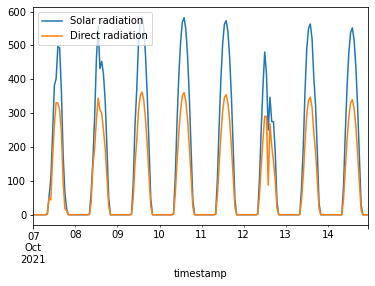

In [20]:
data.plot()